In [2]:
import pandas as pd
import os.path as osp
import numpy as np
from mtools.plot_preamble import *

def load_data(file_path):
    store = pd.HDFStore(file_path, mode='r')
    all_df = store.get('all_imu')
    store.close()
    return all_df

filepath_list = [
    'handheld/data1_1',
    'handbag/data1_1',
    'pocket/data1_1',
    'trolley/data1_1'
]

domains = ['handheld', 'pocket', 'handbag', 'trolley']

dfs = [load_data(osp.join('../data/OxIOD_h5', file_path, 'data.h5')) for file_path in filepath_list]

In [2]:
from mtools import list_find, list_ind
all_domains = [trip.split('/')[0] for trip in filepath_list] 
domain_inds_list = [list_find(all_domains, domain) for domain in domains]
print(domain_inds_list)

for domain_inds in domain_inds_list:
    df = pd.concat(list_ind(dfs, domain_inds))
    acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    mus = np.mean(df[['AccX', 'AccY', 'AccZ', 'AccM']].values, axis=0)
    sigmas = np.std(df[['AccX', 'AccY', 'AccZ', 'AccM']].values-mus, axis=0)
    print(mus, sigmas)

[[0], [1], [2], [3]]
[0.002073 0.018916 -0.007106 0.117102] [0.058415 0.075923 0.078687 0.045475]
[0.006629 -0.010139 0.002584 0.139886] [0.074177 0.135116 0.053131 0.084656]
[-0.030613 0.000949 0.053393 0.284799] [0.171332 0.234551 0.186626 0.204638]
[-0.000095 -0.001994 0.003555 0.061157] [0.033651 0.041200 0.044146 0.032484]


In [ ]:
fontdict = fontdict={'fontweight':'bold'}
start_ind = 2000
end_ind = start_ind + 400
setfontsize(28)

def plot_imu(df, domain):
    df['timeid'] = np.arange(len(df))
    acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    magnitude_mean = np.mean(df['AccM'])
    magnitude_std = np.std(df['AccM']-magnitude_mean)

    plot_df = df[start_ind:end_ind]
    plot_subdf = plot_df[plot_df['AccM']-magnitude_mean>magnitude_std]
    
    time_x = (plot_df['timeid']-plot_df['timeid'].values[0])/100
    time_x2 = (plot_subdf['timeid']-plot_df['timeid'].values[0])/100
    plt.figure(2, [8, 8])
    plt.subplot(2, 1, 1)
    plt.plot(time_x, plot_df['AccX'], label='AccX')
    plt.plot(time_x, plot_df['AccY'], label='AccY')
    plt.plot(time_x, plot_df['AccZ'], label='AccZ')
    plt.xlabel('', fontdict=fontdict)
    plt.ylabel('Acce. (g)', fontdict=fontdict)
    plt.ylim([-1.0, 1.0])
    plt.legend(['X', 'Y', 'Z'], loc='upper center', handlelength=1.0, frameon=True, fancybox=False, borderpad=0.2, ncol=3)
    plt.title('')
    plt.xticks(range(5), labels=[''] * 5)
    plt.subplot(2, 1, 2)    
    plt.plot(time_x, (plot_df['AccM']-magnitude_mean)/magnitude_std, label='(AccM-mu)/std')
    plt.plot(time_x2, (plot_subdf['AccM']-magnitude_mean)/magnitude_std, linestyle='', marker='.', label='Detected')
    plt.xlabel('Time (ms)', fontdict=fontdict)
    plt.ylabel('DN Acce.', fontdict=fontdict)
    # plt.legend(['X', 'Y', 'Z'], loc='upper right')
    plt.ylim([-2, 6])
    plt.show()

for df,domain in zip(dfs, domains):
    plot_imu(df, domain)


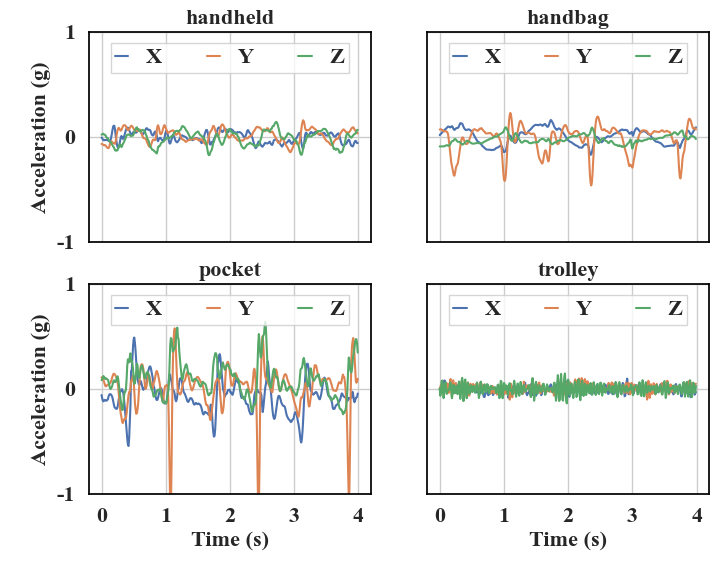

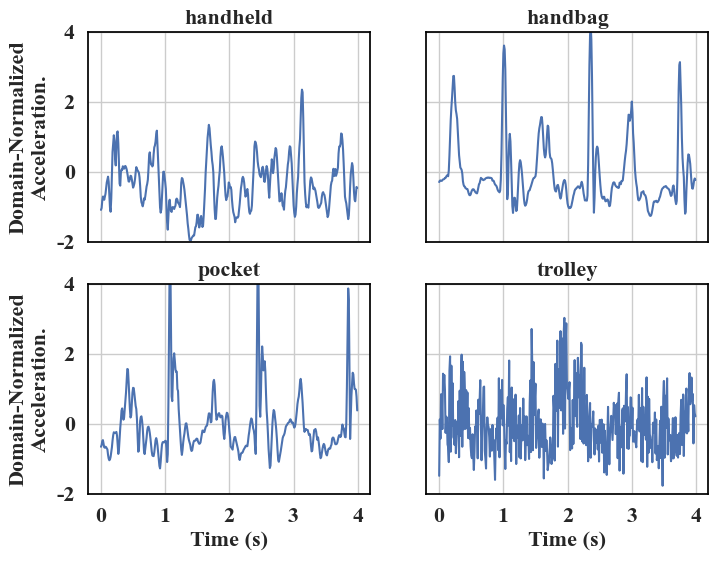

In [56]:
fontdict = fontdict={'fontweight':'bold'}
start_ind = 2000
end_ind = start_ind + 400
setfontsize(16)

def save_pltfig(fig_name):
    plt.savefig(f'{fig_name}.png', bbox_inches='tight')
    plt.savefig(f'{fig_name}.pdf', bbox_inches='tight', transparent=True, pad_inches=0)

def plot_imu(df, domain, plot_type, i):
    df['timeid'] = np.arange(len(df))
    acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    magnitude_mean = np.mean(df['AccM'])
    magnitude_std = np.std(df['AccM']-magnitude_mean)

    plot_df = df[start_ind:end_ind]
    plot_subdf = plot_df[plot_df['AccM']-magnitude_mean>magnitude_std]
    
    time_x = (plot_df['timeid']-plot_df['timeid'].values[0])/100
    time_x2 = (plot_subdf['timeid']-plot_df['timeid'].values[0])/100
    
    if plot_type == 'Acc':
        plt.plot(time_x, plot_df['AccX'], label='AccX')
        plt.plot(time_x, plot_df['AccY'], label='AccY')
        plt.plot(time_x, plot_df['AccZ'], label='AccZ')
        
        plt.title(domain, fontdict=fontdict)
        if i%2==0 :
            plt.ylabel('\nAcceleration (g)', fontdict=fontdict)
            plt.yticks([-1, 0, 1]) # , labels=[''] * 5
        else:
            plt.ylabel('', fontdict=fontdict)
            plt.yticks([-1, 0, 1], labels=[''] * 3) # 
        plt.ylim([-1.0, 1.0])
        if i>=2:
            plt.xlabel('Time (s)', fontdict=fontdict)
            plt.xticks(range(5)) # , labels=[''] * 5
        else:
            plt.xticks(range(5), labels=[''] * 5) #
        plt.legend(['X', 'Y', 'Z'], loc='upper center', handlelength=0.6, frameon=True, fancybox=False, borderpad=0.2, ncol=3) 
    else:
        plt.plot(time_x, (plot_df['AccM']-magnitude_mean)/magnitude_std, label='(AccM-mu)/std')
        # plt.plot(time_x2, (plot_subdf['AccM']-magnitude_mean)/magnitude_std, linestyle='', marker='.', label='Detected')
        plt.title(domain, fontdict=fontdict)
        if i%2==0 :
            plt.ylabel('Domain-Normalized\nAcceleration.', fontdict=fontdict)
            plt.yticks([-2, 0, 2, 4]) # , labels=[''] * 5
        else:
            plt.ylabel('', fontdict=fontdict)
            plt.yticks([-2, 0, 2, 4], labels=[''] * 4) # 
        
        if i>=2:
            plt.xlabel('Time (s)', fontdict=fontdict)
            plt.xticks(range(5)) # , labels=[''] * 5
        else:
            plt.xticks(range(5), labels=[''] * 5)
        plt.ylim([-2.0, 4.0])
    

plt.figure(4, [8, 6])
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
for i,df,domain in zip(range(len(domains)),dfs, domains):
    plt.subplot(2, 2, i+1)
    plot_imu(df, domain, 'Acc', i)
save_pltfig(f'figures/imu_acc')
plt.show()


plt.figure(4, [8, 6])
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
for i,df,domain in zip(range(len(domains)),dfs, domains):
    plt.subplot(2, 2, i+1)
    plot_imu(df, domain, 'AccM', i)
save_pltfig(f'figures/imu_accm')
plt.show()

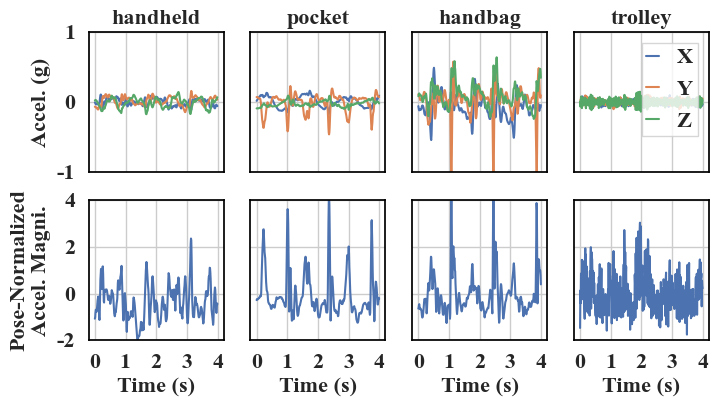

In [4]:
fontdict = fontdict={'fontweight':'bold'}
start_ind = 2000
end_ind = start_ind + 400
setfontsize(16)

def save_pltfig(fig_name):
    plt.savefig(f'{fig_name}.png', bbox_inches='tight')
    plt.savefig(f'{fig_name}.pdf', bbox_inches='tight', transparent=True, pad_inches=0)

def plot_imu(df, domain, i):
    df['timeid'] = np.arange(len(df))
    acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    magnitude_mean = np.mean(df['AccM'])
    magnitude_std = np.std(df['AccM']-magnitude_mean)

    plot_df = df[start_ind:end_ind]
    plot_subdf = plot_df[plot_df['AccM']-magnitude_mean>magnitude_std]
    
    time_x = (plot_df['timeid']-plot_df['timeid'].values[0])/100
    time_x2 = (plot_subdf['timeid']-plot_df['timeid'].values[0])/100
    
    plt.subplot(2, 4, i+1)
    plt.plot(time_x, plot_df['AccX'], label='AccX')
    plt.plot(time_x, plot_df['AccY'], label='AccY')
    plt.plot(time_x, plot_df['AccZ'], label='AccZ')
    
    plt.title(domain, fontdict=fontdict)
    if i==0 :
        plt.ylabel('\nAccel. (g)', fontdict=fontdict)
        plt.yticks([-1, 0, 1]) # , labels=[''] * 5
    else:
        plt.ylabel('', fontdict=fontdict)
        plt.yticks([-1, 0, 1], labels=[''] * 3) # 
    plt.ylim([-1.0, 1.0])
    plt.xticks(range(5), labels=[''] * 5) #
    if i==3:
        plt.legend(['X', 'Y', 'Z'], loc='upper right', handlelength=0.6, frameon=True, fancybox=False, borderpad=0.2) 
    
    plt.subplot(2, 4, i+5)
    plt.plot(time_x, (plot_df['AccM']-magnitude_mean)/magnitude_std, label='(AccM-mu)/std')
    # plt.plot(time_x2, (plot_subdf['AccM']-magnitude_mean)/magnitude_std, linestyle='', marker='.', label='Detected')
    if i==0:
        plt.ylabel('Pose-Normalized\nAccel. Magni.', fontdict=fontdict)
        plt.yticks([-2, 0, 2, 4]) # , labels=[''] * 5
    else:
        plt.ylabel('', fontdict=fontdict)
        plt.yticks([-2, 0, 2, 4], labels=[''] * 4) # 
    
    plt.xlabel('Time (s)', fontdict=fontdict)
    plt.xticks(range(5)) # , labels=[''] * 5
    plt.ylim([-2.0, 4.0])
    

plt.figure(8, [8, 4])
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
for i,df,domain in zip(range(len(domains)),dfs, domains):
    plot_imu(df, domain, i)
save_pltfig(f'figures/imu_acc_accm')
plt.show()

In [74]:
dfs[0].columns

Index(['time', 'rollDeg', 'pitchDeg', 'yawDeg', 'GysX', 'GysY', 'GysZ', 'GraX', 'GraY', 'GraZ', 'AccX', 'AccY', 'AccZ', 'MagX', 'MagY', 'MagZ', 'AccE', 'AccN', 'AccU', 'GysE', 'GysN', 'GysU', 'PosE', 'PosN', 'PosU', 'timeid', 'AccM'], dtype='object')

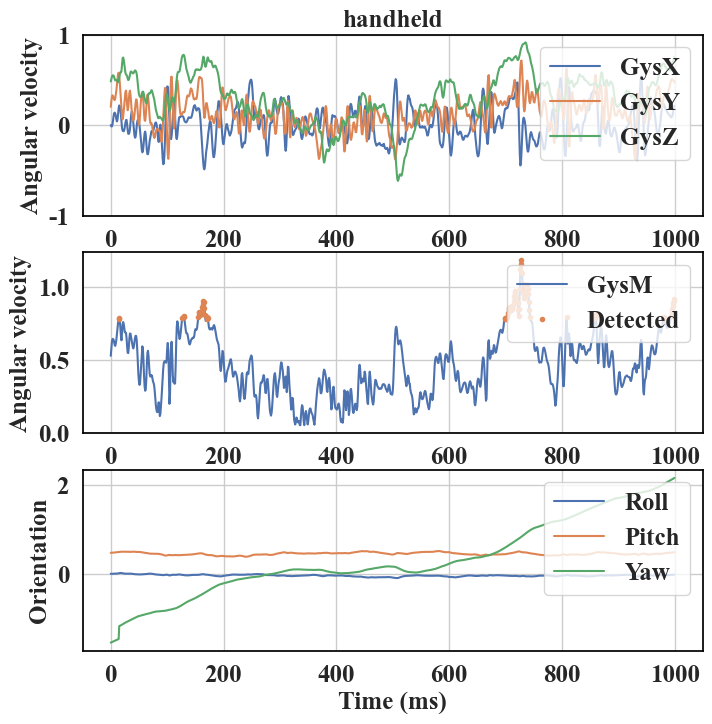

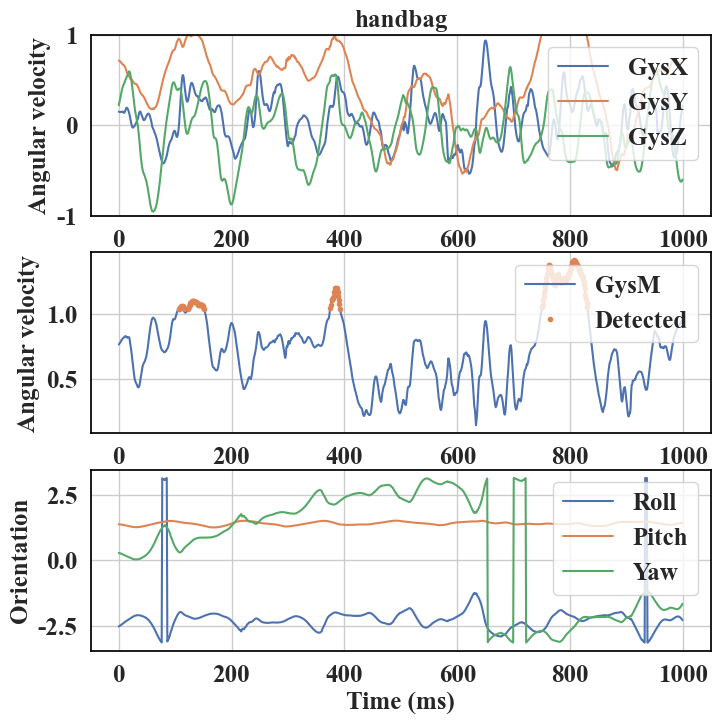

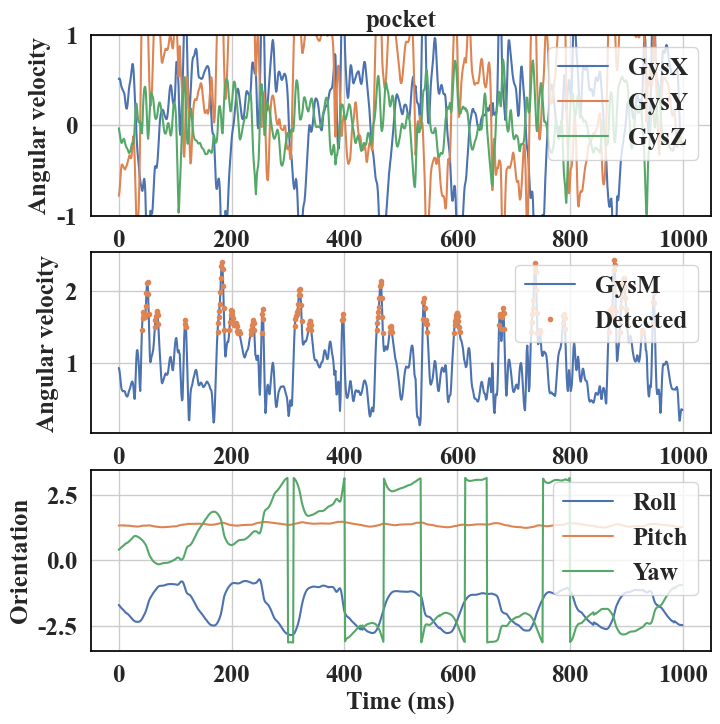

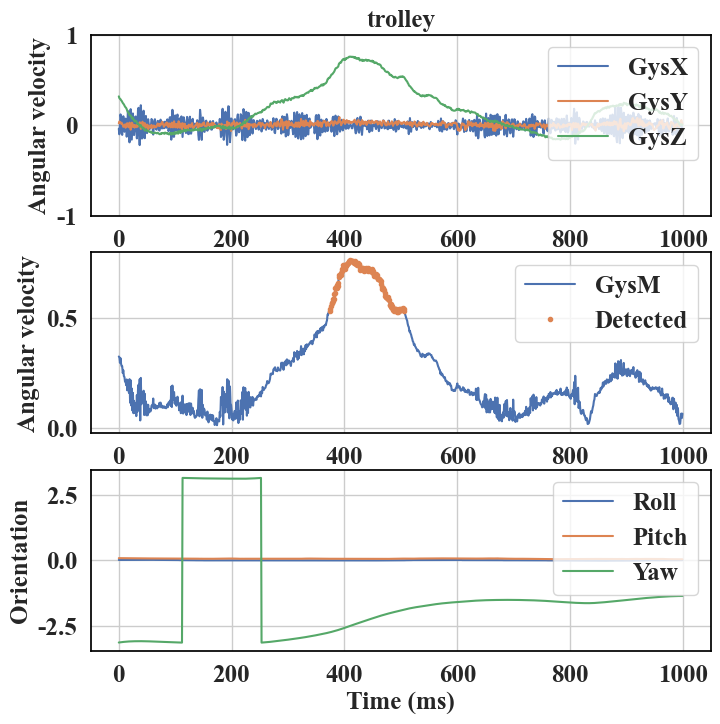

In [87]:
def rerange_angles(rad):
    deg = np.rad2deg(rad)%360
    deg[deg>180] = deg[deg>180]-360
    return np.deg2rad(deg)

def plot_imu_gys(df, domain):
    df['timeid'] = np.arange(len(df))
    acc_np = df[['GysX', 'GysY', 'GysZ']].values.astype("float32")
    df['GysM'] = np.linalg.norm(acc_np, axis=-1)
    magnitude_mean = np.mean(df['GysM'])
    magnitude_std = np.std(df['GysM']-magnitude_mean)

    df['rollDeg_d']  = rerange_angles(np.concatenate(([0], df['rollDeg'].values[:-1] - df['rollDeg'].values[1:])))
    df['pitchDeg_d'] = rerange_angles(np.concatenate(([0], df['pitchDeg'].values[:-1] - df['pitchDeg'].values[1:])))
    df['yawDeg_d']   = rerange_angles(np.concatenate(([0], df['yawDeg'].values[:-1] - df['yawDeg'].values[1:])))

    plot_df = df[2000:3000]
    plot_subdf = plot_df[plot_df['GysM']-magnitude_mean>magnitude_std]
    

    plt.figure(3, [8, 8])
    plt.subplot(3, 1, 1)
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['GysX'], label='GysX')
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['GysY'], label='GysY')
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['GysZ'], label='GysZ')
    plt.xlabel('Time (ms)', fontdict=fontdict)
    plt.ylabel('Angular velocity', fontdict=fontdict)
    plt.ylim([-1.0, 1.0])
    plt.legend(loc='upper right')
    plt.title(domain, fontdict=fontdict)
    plt.subplot(3, 1, 2)
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['GysM'], label='GysM')
    plt.plot(plot_subdf['timeid']-plot_df['timeid'].values[0], plot_subdf['GysM'], linestyle='', marker='.', label='Detected')
    plt.xlabel('Time (ms)', fontdict=fontdict)
    plt.ylabel('Angular velocity', fontdict=fontdict)
    plt.legend(loc='upper right')

    # 'rollDeg', 'pitchDeg', 'yawDeg'
    plt.subplot(3, 1, 3)
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['rollDeg'],  label='Roll')
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['pitchDeg'], label='Pitch')
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['yawDeg'],   label='Yaw')
    plt.xlabel('Time (ms)', fontdict=fontdict)
    plt.ylabel('Orientation', fontdict=fontdict)
    plt.legend(loc='upper right')

    # plt.subplot(4, 1, 4)
    # plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['rollDeg_d'],  label='Roll')
    # plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['pitchDeg_d'], label='Pitch')
    # plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['yawDeg_d'],   label='Yaw')
    # plt.xlabel('Time (ms)', fontdict=fontdict)
    # plt.ylabel('Orientation Diff', fontdict=fontdict)
    # plt.legend(loc='upper right')
    plt.show()

for df,domain in zip(dfs, domains):
    plot_imu_gys(df, domain)

In [ ]:
def plot_imu(df, domain):
    df['timeid'] = np.arange(len(df))
    acc_np = df[['AccX', 'AccY', 'AccZ']].values.astype("float32")
    df['AccM'] = np.linalg.norm(acc_np, axis=-1)
    magnitude_mean = np.mean(df['AccM'])
    magnitude_std = np.std(df['AccM']-magnitude_mean)

    plot_df = df[2000:3000]
    plot_subdf = plot_df[plot_df['AccM']-magnitude_mean>magnitude_std]

    plt.figure(2, [8, 8])
    plt.subplot(3, 1, 1)
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['AccX'], label='AccX')
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['AccY'], label='AccY')
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['AccZ'], label='AccZ')
    plt.xlabel('Time (ms)', fontdict=fontdict)
    plt.ylabel('Acceleration (g)', fontdict=fontdict)
    plt.ylim([-1.0, 1.0])
    plt.legend(loc='upper right')
    plt.title(domain, fontdict=fontdict)
    plt.subplot(3, 1, 2)
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], plot_df['AccM'], label='AccM')
    plt.plot(plot_subdf['timeid']-plot_df['timeid'].values[0], plot_subdf['AccM'], linestyle='', marker='.', label='Detected')
    plt.xlabel('Time (ms)', fontdict=fontdict)
    plt.ylabel('Acceleration (g)', fontdict=fontdict)
    plt.legend(loc='upper right')
    plt.ylim([0, 0.6])
    plt.subplot(3, 1, 3)
    plt.plot(plot_df['timeid']-plot_df['timeid'].values[0], (plot_df['AccM']-magnitude_mean)/magnitude_std, label='(AccM-mu)/std')
    plt.plot(plot_subdf['timeid']-plot_df['timeid'].values[0], (plot_subdf['AccM']-magnitude_mean)/magnitude_std, linestyle='', marker='.', label='Detected')
    plt.xlabel('Time (ms)', fontdict=fontdict)
    plt.ylabel('Normalized Acceleration', fontdict=fontdict)
    plt.legend(loc='upper right')
    plt.ylim([-2, 5])
    plt.show()

for df,domain in zip(dfs, domains):
    plot_imu(df, domain)

In [29]:
def set_gs(g, fontsize=18, xlabel='', ylabel='', title='', fontdict={'fontweight':'bold'}, **kwargs):
    setfontsize(fontsize)
    g.set_xlabels(xlabel, fontdict=fontdict)
    g.set_ylabels(ylabel, fontdict=fontdict)
    g.set_titles('')
    g.set(**kwargs)
    g.legend.set_title('')

/tmp/ipykernel_12871/1300506923.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([''] * 6)


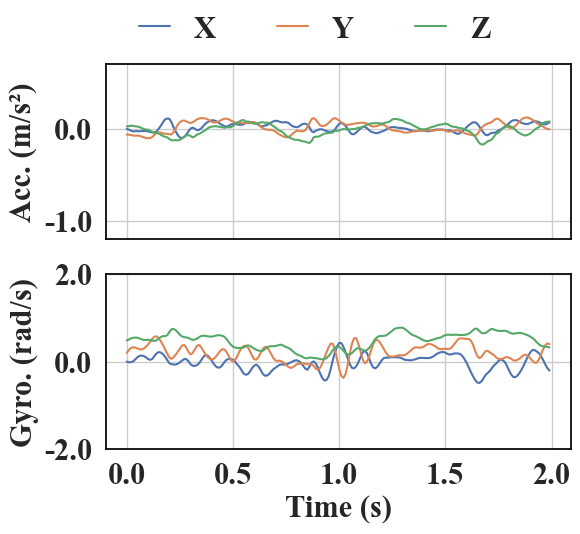

/tmp/ipykernel_12871/1300506923.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([''] * 6)


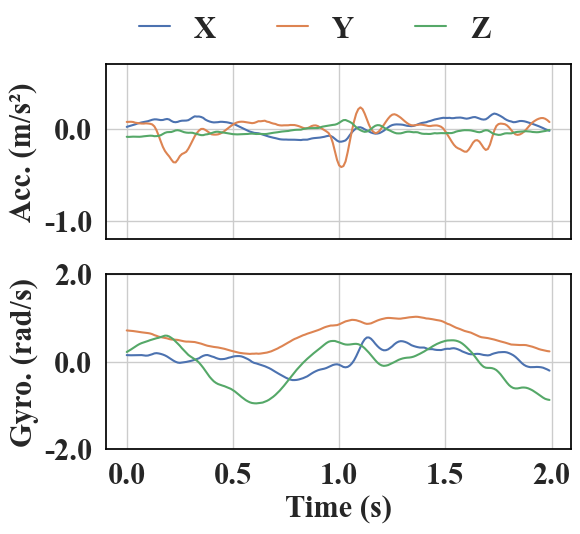

/tmp/ipykernel_12871/1300506923.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([''] * 6)


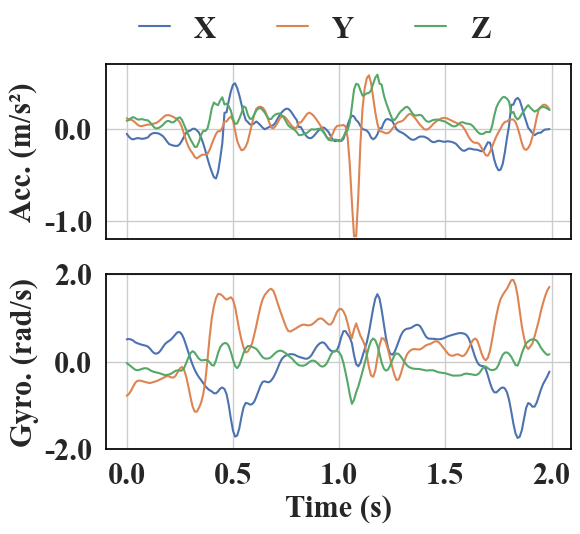

/tmp/ipykernel_12871/1300506923.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([''] * 6)


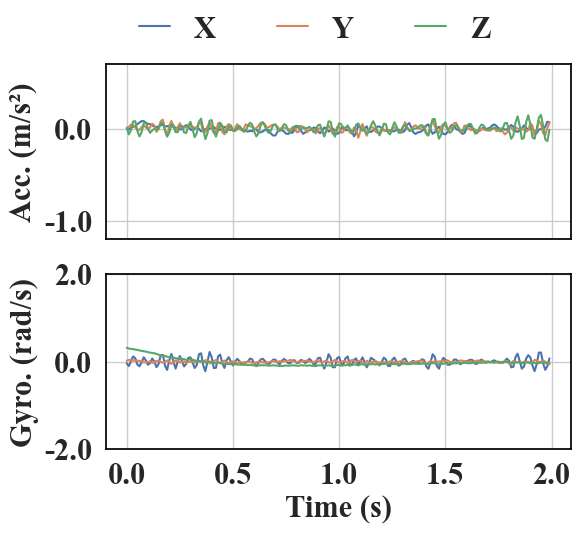

In [102]:
from mtools import select_df
from mtools.plot_preamble import set_g

import matplotlib.ticker as ticker

def change_legend_text(g, new_labels = ['X', 'Y', 'Z']):
    for text, label in zip(g.get_legend().get_texts(), new_labels):
        text.set_text(label)

# 设置 y 轴刻度的小数位数
decimal_places = 1  # 设置小数位数为2

# 创建格式化器对象，设置小数位数
formatter = ticker.FormatStrFormatter(f'%.{decimal_places}f')

for df,domain in zip(dfs, domains):
    df['domain'] = domain
    df['timeid'] = np.arange(len(df))

plot_df = pd.concat(df[2000:2200] for df in dfs)
plot_df['timeid'] = (plot_df['timeid'] - plot_df['timeid'].values[0])/100
plot_df.head()

acc_melt_df = pd.melt(plot_df, id_vars=['timeid', 'domain'], value_vars=['AccX', 'AccY', 'AccZ'])
acc_melt_df['type'] = 'acc'
gys_melt_df = pd.melt(plot_df, id_vars=['timeid', 'domain'], value_vars=['GysX', 'GysY', 'GysZ'])
gys_melt_df['type'] = 'gys'
melt_df = pd.concat([acc_melt_df, gys_melt_df])

for domain in domains:
    plt.figure(figsize=(6, 5))
    for i,_type in enumerate(['acc', 'gys']):
        plt.subplot(2, 1, i+1)
        tmp_df = select_df(melt_df, 'domain', domain)
        tmp_df = select_df(tmp_df, 'type', _type)
        g = sns.lineplot(data=tmp_df, x='timeid', y='value', hue='variable')
        set_g(g, 22, xlabel='Time (s)', ylabel='Acc. (m/s\u00B2)' if _type == 'acc' else 'Gyro. (rad/s)')
        if _type == 'acc':
            sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.45, 1.4), handlelength=1.0, frameon=False, fancybox=False, borderpad=0.2, ncol=3)
            change_legend_text(g)
            g.set_xticklabels([''] * 6)
            g.set_xlabel('')
            g.set_ylim(-1.2, 0.7)
        else:
            g.get_legend().remove()
            g.set_ylim(-2, 2)
        plt.gca().yaxis.set_major_formatter(formatter) # 应用格式化器到 y 轴刻度    
    plt.show()
    save_fig(g, f'figures/imu_{domain}')
    # break
